IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

DJERFAF Ilyes\
TAFOUGHALT Anyes

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

# Importation de la librairie pickle
import pickle as pkl

# lecture des donnéees en dimension 2 dans un dataframe pandas
data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

In [2]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [3]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [4]:
print(Y2D[0:5])

[-1. -1. -1. -1. -1.]


# Import de notre iads :
L'ensemble des fonctions qu'on a développé dans les premiers TME 

In [5]:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

In [6]:
# iads doit être dans le répertoire père du répertoire courant !
import iads as iads

In [7]:
# importation de Classifiers
from iads import Classifiers as classif

In [8]:
# importation de utils
from iads import utils as ut

# Expérimentation **KNN**
<span style="color:blue">

-   En utilisant le graph d'accuracy en fonction de k, on peut identifier la complexité du modèle. Si la valeur de k est faible, le modèle sera plus complexe et s'ajustera mieux aux données d'entraînement. Cependant, cela peut entraîner un surapprentissage (overfitting) et une moins bonne performance sur les données de test. Si la valeur de k est élevée, le modèle sera plus simple et risque de sous-apprendre (underfitting), ce qui peut également entraîner une moins bonne performance sur les données de test.

-   Le graph d'accuracy de test en fonction de k peut être utilisé pour déterminer la valeur optimale de k. Cette valeur correspond à celle qui donne la meilleure performance sur les données de test (Pic). 

</span>

<span style="color:red">
Il est important de noter que cette valeur optimale peut varier en fonction du jeu de données et des caractéristiques spécifiques de chaque problème.
</span>

## Dataset : data-2D.pkl

### Détermination de la zone de pic de K

In [9]:
def crossval_strat(X, Y, n_iterations, iteration):
    index_pos = np.where(Y == 1)[0]
    index_neg = np.where(Y == -1)[0]

    index_pos_test = index_pos[iteration*(len(index_pos) // n_iterations): (
        iteration+1)*(len(index_pos) // n_iterations)]
    index_neg_test = index_neg[iteration*(len(index_neg) // n_iterations): (
        iteration+1)*(len(index_neg) // n_iterations)]

    Xtest = np.concatenate((X[index_neg_test], X[index_pos_test]))
    Ytest = np.concatenate((Y[index_neg_test], Y[index_pos_test]))

    index_app = np.setdiff1d(np.arange(len(Y)), np.concatenate([index_pos_test, index_neg_test]))   

    Xapp = X[index_app]
    Yapp = Y[index_app]
    return Xapp, Yapp, Xtest, Ytest


#### Stratégie : 1- Prendre un K tres grand pour situer la zone de pic

In [10]:
k_values = list(range(1, 100, 16))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/iter)
    knn_accuracy_test.append(it_test/iter)

##### Ploter les résultats

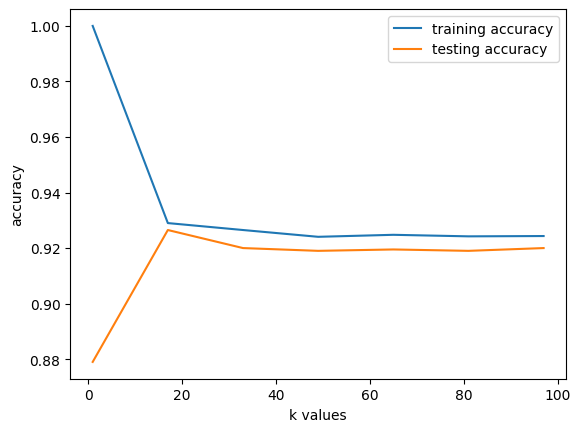

In [11]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

##### Analyse des résultats

<span style="color:blue">

-   En analysant le graph de testing accuracy, on remarque que le pic d'accuracy du test est entre k<20 et k>10

-   Maintenant, on va extraire la valeur exacte du k pour le pic

</span>


#### Stratégie : 2- Extraire la valeur de K, et étude de temps d'execution

In [12]:
k_values = list(range(11, 20, 2))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

# Initialiser une liste vide pour stocker les temps d'exécution pour chaque valeur de k
times = []

for k in k_values:
    classifierKNN = classif.ClassifierKNN(2, k)
    it_train=0
    it_test=0
    # Mesurer le temps d'entraînement et de prédiction
    start_time = time.perf_counter()
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train+=classifierKNN.accuracy(Xapp, Yapp)
        it_test+=classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)
    end_time = time.perf_counter()

    # Ajouter le temps d'exécution à la liste de temps
    times.append(end_time - start_time)


##### Ploter les résultats

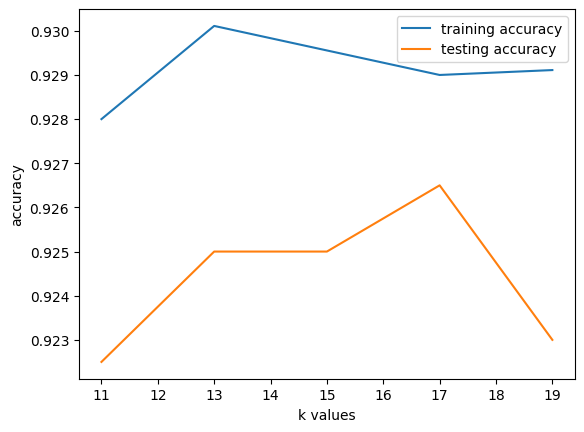

In [13]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

##### Ploter le graphe du temps d'exécution

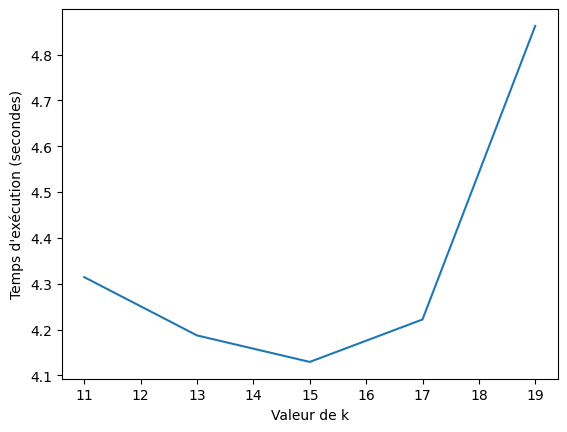

In [14]:
# Tracer un graphique des temps d'exécution par rapport à la valeur de k
import matplotlib.pyplot as plt
plt.plot(k_values, times)
plt.xlabel('Valeur de k')
plt.ylabel('Temps d\'exécution (secondes)')
plt.show()

##### Analyse des résultats
<span style="color:blue">

-   Pour notre premier dataset "Data-2D" la valeur de k optimal est : **17** avec une accuracy de : **0.9265**
-   On note que la différence de temps d'exécution entre k = 15 et k = 17 n'est pas vraiment significative, et que la différence soit simplement due à des variations aléatoires dans le temps d'exécution. Dans ce cas, il est préférable de prendre en compte la valeur de k qui donne la meilleure accuracy de test, même si le temps d'exécution est légèrement plus long.

</span>

##### Conclusion sur KNN avec k otimal = 17 sur Data 2D

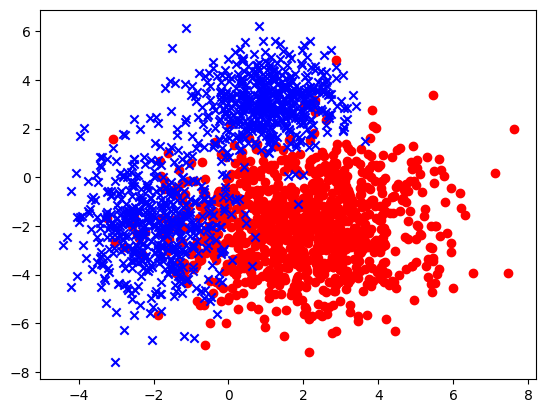

In [27]:
# Affichage
ut.plot2DSet(X2D,Y2D)

L'accuracy est  0.9600000000000006
Le temps de calcul est  0.03644032999873161  en s


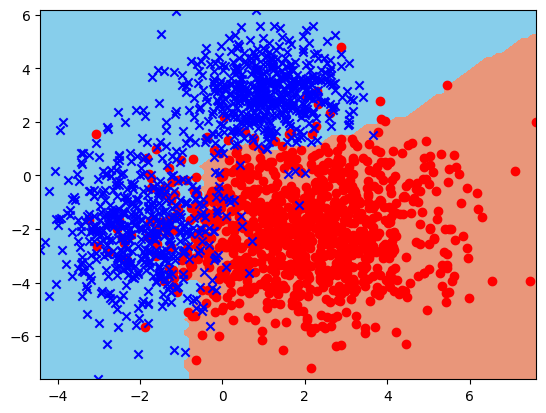

In [74]:
times = 0
acc = 0
for i in range(30):
    classifierKNN = classif.ClassifierKNN(2, 17)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
    start_time = time.perf_counter()
    classifierKNN.train(Xapp, Yapp)
    acc += classifierKNN.accuracy(Xtest, Ytest)
    end_time = time.perf_counter()
    times += end_time - start_time
print("L'accuracy est ", str(acc/30))
print("Le temps de calcul est ", str(times/30), " en s")


ut.plot_frontiere(X2D, Y2D, classifierKNN, step=100)
ut.plot2DSet(X2D,Y2D)

## Dataset : data-5D.pkl

In [48]:
# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb'))
# conversion de type pour une meilleure compatibilité
X5D = np.array(data5D[['x1', 'x2' , 'x3', 'x4', 'x5']], dtype=float)
Y5D = np.array(data5D['label'], dtype=float)

### Détermination de la zone de pic de K

In [49]:
k_values = list(range(1, 100, 16))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(5, k)
    it_train = 0
    it_test = 0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/iter)
    knn_accuracy_test.append(it_test/iter)



##### Ploter les résultats

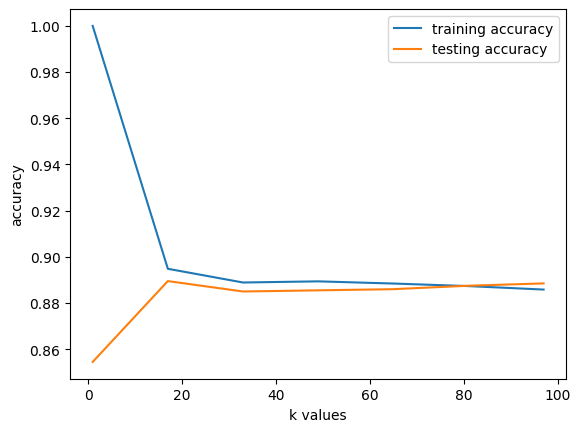

In [50]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()


On remarque que à la fin du graphe il y a une légére augmentation de l'accuracy, par conséquent on va itérer k jusqu'à 500 pour voir ce qu'il va se passe


In [52]:
k_values = list(range(1, 500, 16))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

for k in k_values:
    classifierKNN = classif.ClassifierKNN(5, k)
    it_train = 0
    it_test = 0
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/iter)
    knn_accuracy_test.append(it_test/iter)



##### Ploter les résultats

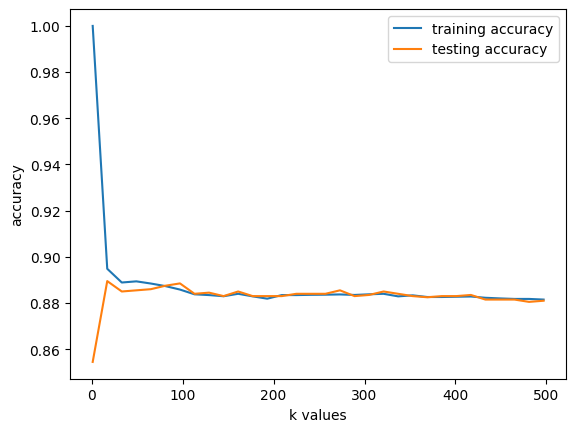

In [54]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

#### Analyse des résultats
<span style="color:blue">

-   En analysant les 2 graphes de testing accuracy, on remarque que le pic d'accuracy du test est <100 et plus précisément il est entre k<20 et k>10 
(d'aprés le graphe 1)

-   Maintenant, on va extraire la valeur exacte du k pour le pic

</span>

### Extraire la valeur de K

In [61]:
k_values = list(range(11, 20, 2))
knn_accuracy_test = []
knn_accuracy_train = []
iter = 10

# Initialiser une liste vide pour stocker les temps d'exécution pour chaque valeur de k
times = []

for k in k_values:
    classifierKNN = classif.ClassifierKNN(5, k)
    it_train = 0
    it_test = 0
    # Mesurer le temps d'entraînement et de prédiction
    start_time = time.perf_counter()
    for i in range(iter):
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        classifierKNN.train(Xapp, Yapp)
        it_train += classifierKNN.accuracy(Xapp, Yapp)
        it_test += classifierKNN.accuracy(Xtest, Ytest)
    knn_accuracy_train.append(it_train/10)
    knn_accuracy_test.append(it_test/10)
    end_time = time.perf_counter()

    # Ajouter le temps d'exécution à la liste de temps
    times.append(end_time - start_time)


##### Ploter les résultats

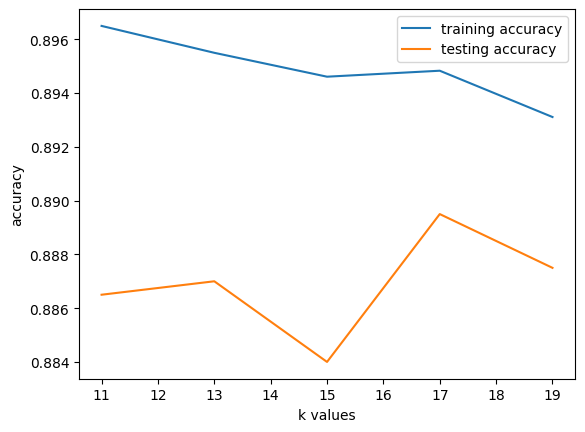

In [62]:
plt.plot(k_values, knn_accuracy_train, label='training accuracy')
plt.plot(k_values, knn_accuracy_test, label='testing accuracy')
plt.legend()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()


##### Analyse des résultats
<span style="color:blue">

-   Pour notre 2eme dataset "Data-5D" la valeur de k optimal est : **17** aussi avec une accuracy de : **0.89**
</span>

##### Conclusion sur KNN avec k otimal = 17 sur Data 5D

In [67]:
times = 0
acc = 0
for i in range(30):
    classifierKNN = classif.ClassifierKNN(5, 17)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
    start_time = time.perf_counter()
    classifierKNN.train(Xapp, Yapp)
    acc += classifierKNN.accuracy(Xtest, Ytest)
    end_time = time.perf_counter()
    times += end_time - start_time
print("L'accuracy est ", str(acc/30))
print("Le temps de calcul est ", str(times/30), " en s")

L'accuracy est  0.8900000000000003
Le temps de calcul est  0.0499796999967657  en s


## Conclusion sur le Modèle KNN

-   Nous avons testé notre modèle de classification KNN sur deux jeux de données différents : un jeu de données en 2 dimensions et un autre en 5 dimensions. Nous avons utilisé différents valeurs de k et nous avons noté l'accuracy du modèle et le temps d'exécution pour chaque valeur de k.

-   Nous avons observé que pour le jeu de données en 2 dimensions, le k optimal était de 17, avec une précision de 0,96 et un temps d'exécution de 0.036 secondes.

-   Pour le jeu de données en 5 dimensions, nous avons trouvé que le k optimal était aussi de 17, avec une précision de 0,89 et un temps d'exécution de 0.049 secondes. 

-   On peut expliquer les résultats obtenus pour les deux jeux de données sont différents en raison de la complexité et de la dimensionnalité des données. Le jeu de données en 2 dimensions est moins complexe et moins dimensionnel que celui en 5 dimensions, par conséquent l'accuracy (pour le K le plus optimale) est plus élevé dans le jeu de données en 2 dimensions par rapport à un jeu de 5 dimensions.

-   Enfin, le temps d'exécution est également affecté par la complexité et la dimensionnalité des données, car le modèle doit parcourir plus de points dans l'espace pour trouver les voisins les plus proches.

| Jeu de données | k optimal | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- |
| 2D | 17 | 0,96 | 0.03644 |
| 5D | 17 | 0,89 | 0.04997 |

# Expérimentation **Perceptron**

-   Pour trouver la valeur optimale du taux d'apprentissage pour notre modèle Perceptron, nous allons utiliser une approche par **recherche de grille**, ou on va définir une plage de valeurs pour le taux d'apprentissage et entraîner le modèle avec chaque valeur pour trouver celle qui donne les meilleures performances.

<p style="color:red">
-   Il est important de noter que le paramètre du poids (w) n'est pas vraiment un paramètre, mais plutôt une variable interne du modèle qui est initialisée en fonction de la valeur du paramètre init. En effet, le poids est ensuite ajusté par l'algorithme en fonction des données d'entraînement.
</p>

-   Nous allons donc tester les deux cas d'initialisation des poids(init=[True, False]) pour voir laquelle donne les meilleures performances pour chaque dataset.

-   Il faut qu'on fixe le seed a une valeur donnée, pour pouvoir comparer les résultats 



In [88]:
random.seed(38)

## Dataset : data-2D.pkl

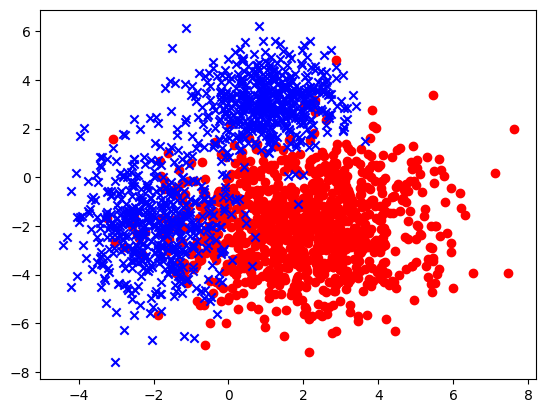

In [97]:
# affichage des données
ut.plot2DSet(X2D,Y2D)

### Variation de Learning Rate (init = True)

In [89]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(input_dimension=2, learning_rate=learning_rate, init=True)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

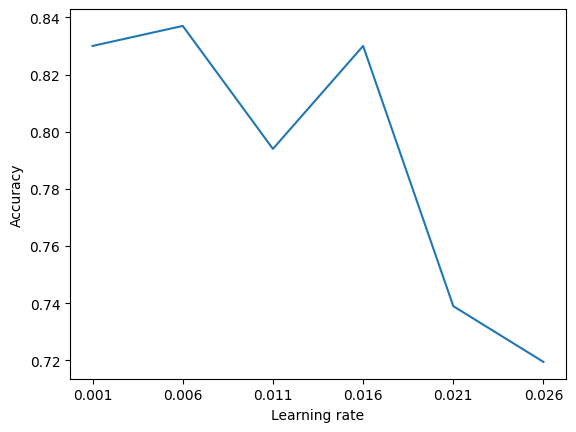

In [90]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [91]:
lr_true = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=True est : ", lr_true)

le learning rate optimal pour init=True est :  0.006


### Variation de Learning Rate (init = False)

In [92]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(input_dimension=2, learning_rate=learning_rate, init=False)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

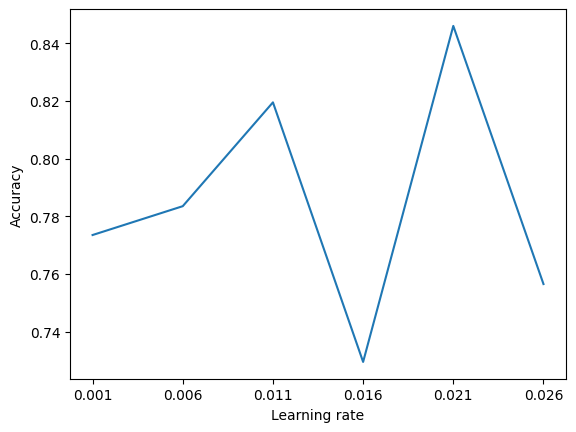

In [93]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [94]:
lr_false = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=False est : ",
      lr_false)


le learning rate optimal pour init=False est :  0.021


#### <span style="color:blue"> Quoi choisir : init=False ou init=Ture ? </span>
Apres avoir les learning rate optimaux pour les deux, on va faire une série d'expérimentation pour savoir l'impact de chacun


In [96]:
acc_true = 0 
time_true = 0  


for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptron(input_dimension=2, learning_rate=lr_true, init=True)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_true += perceptron.accuracy(Xtest, Ytest)
    time_true += execution_time

acc_true = acc_true/30
time_true = time_true/30

print("l'accuracy pour init=True est : ", acc_true)
print("le temps d'exécution moyen pour init=True est : ", time_true)

acc_false = 0
time_false = 0

for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptron(
        input_dimension=2, learning_rate=lr_false, init=False)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_false += perceptron.accuracy(Xtest, Ytest)
    time_false += execution_time
acc_false = acc_false/30
time_false = time_false/30

print("l'accuracy pour init=False est : ", acc_false)
print("le temps d'exécution moyen pour init=False est : ", time_false)

l'accuracy pour init=True est :  0.8076666666666666
le temps d'exécution moyen pour init=True est :  0.9731517866641904
l'accuracy pour init=False est :  0.7991666666666665
le temps d'exécution moyen pour init=False est :  0.6862657799986968


#### Etude de la convergence du perceptron 

In [117]:
def C_evolutions(data, label, allw):
    """ensemble est une liste de vecteur"""
    cost = []
    for i in range(len(allw)):
        w = allw[i].copy()
        y_i = np.dot(data, w)
        C = np.multiply(label, y_i)
        C = np.ones(len(data))-C
        C[C <= 0] = 0
        cost.append(np.sum(C))

    return cost


#### Perceptron 1 : 2 dimentions, learning rate optimal true, init = true

Accuracy :  0.83
Temps d'exécution :  0.3903351000044495


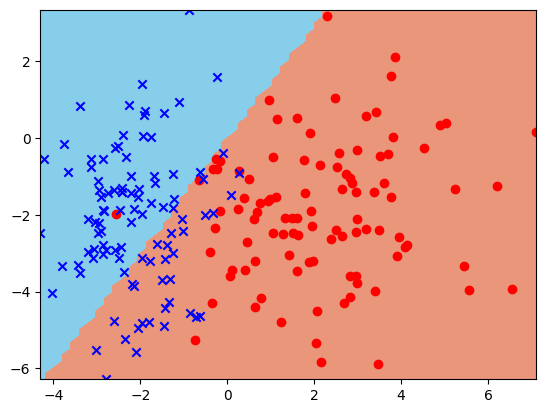

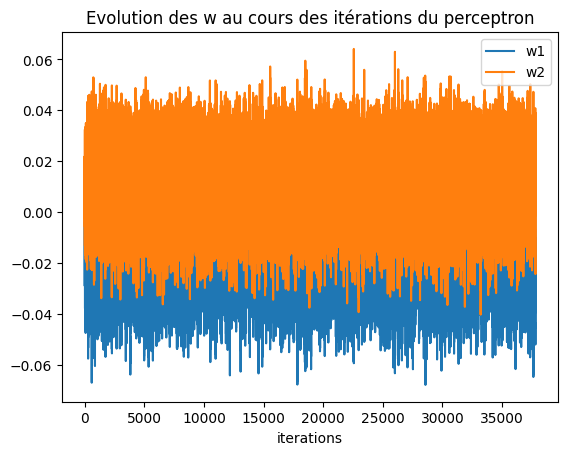

In [145]:
perceptron1 = classif.ClassifierPerceptron(2, learning_rate=lr_true, init=True)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
start_time = time.perf_counter()
les_differences = perceptron1.train(Xapp, Yapp)
print("Accuracy : ", perceptron1.accuracy(Xtest, Ytest))
end_time = time.perf_counter()
execution_time = end_time - start_time
print("Temps d'exécution : ", execution_time)
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(Xtest, Ytest, perceptron1, step=60)
ut.plot2DSet(Xtest, Ytest)
# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron1.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

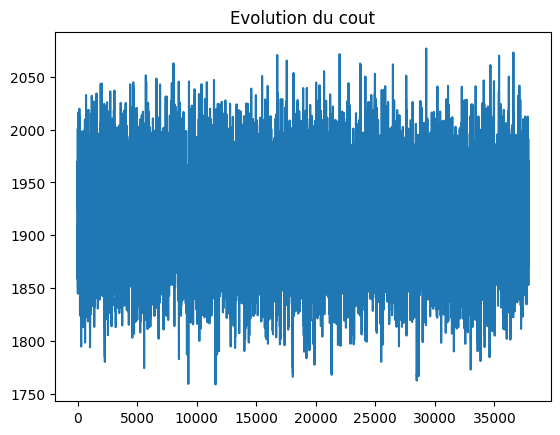

In [118]:
cout_evolution = C_evolutions(X2D,Y2D,allw)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


Perceptron 2 : 2 dimentions, learning rate optimal false, init = false

Accuracy :  0.93
Temps d'exécution :  0.3689377999980934


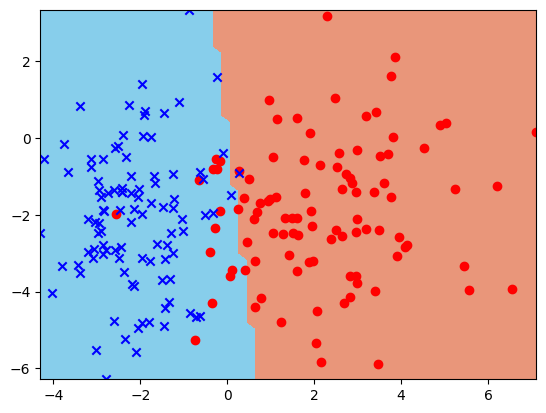

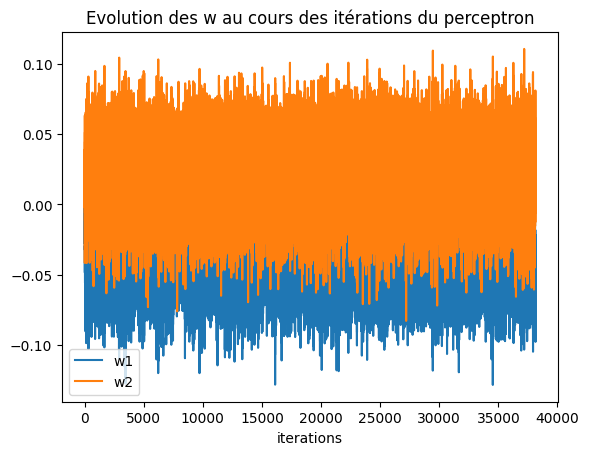

In [153]:
perceptron2 = classif.ClassifierPerceptron(2, learning_rate=lr_false, init=False)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
start_time = time.perf_counter()
les_differences = perceptron2.train(Xapp, Yapp)
print("Accuracy : ", perceptron2.accuracy(Xtest, Ytest))
end_time = time.perf_counter()
execution_time = end_time - start_time
print("Temps d'exécution : ", execution_time)
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(Xtest, Ytest, perceptron2, step=60)
ut.plot2DSet(Xtest, Ytest)
# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

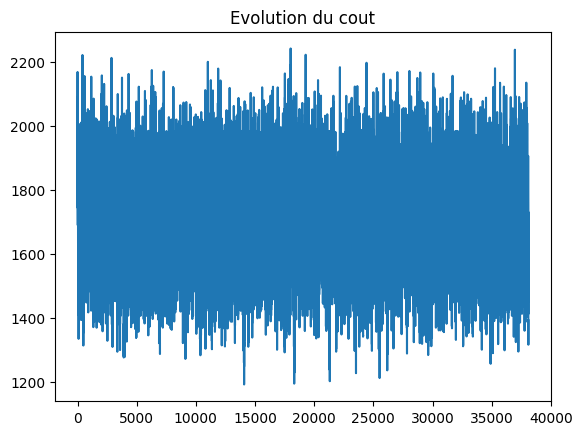

In [109]:
cout_evolution = C_evolutions(X2D, Y2D, allw2)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


#### <span style="color:green">Discussion et Analyse des Réusltats :</span>

-   l'accuracy pour init=True est légèrement supérieure à celle pour init=False (0,807 contre 0,799). Cela suggère que l'initialisation à zéro peut être plus avantageuse dans ce cas.

-   Cependant, il est important de noter que la différence de l'accuracy entre les deux configurations n'est pas très importante. Par conséquent, si le temps d'exécution est une préoccupation importante, il peut être préférable d'utiliser l'initialisation aléatoire. Dans ce cas, le temps d'exécution moyen pour init=False est légèrement inférieur à celui pour init=True (0,68 contre 0,97).

-   Il est également important de souligner que ces résultats ne sont pas définitifs et peuvent varier en fonction des données et des paramètres spécifiques de votre modèle. Par conséquent, nous allons faire la même démarche avec le jeux de données 5D.

| Init | learning rate | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- |
| True | 0.006 | 0,807 | 0,97 |
| False | 0.021 | 0,799 | 0,68 |

## Dataset : data-5D.pkl

On va donc suivre la même démarche

### Variation de Learning Rate (init = True)

In [119]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(input_dimension=5, learning_rate=learning_rate, init=True)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

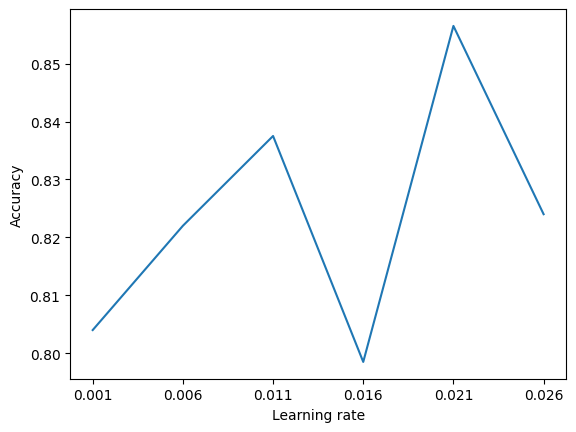

In [120]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [121]:
lr_true = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=True est : ", lr_true)

le learning rate optimal pour init=True est :  0.021


### Variation de Learning Rate (init = False)

In [123]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptron(input_dimension=5, learning_rate=learning_rate, init=False)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

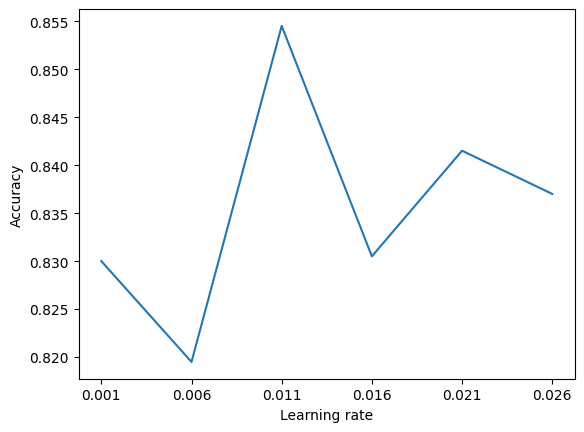

In [124]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [125]:
lr_false = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=False est : ",
      lr_false)


le learning rate optimal pour init=False est :  0.011


#### <span style="color:blue"> Quoi choisir : init=False ou init=Ture ? </span>
Apres avoir les learning rate optimaux pour les deux, on va faire une série d'expérimentation pour savoir l'impact de chacun


In [172]:
acc_true = 0 
time_true = 0  


for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptron(input_dimension=5, learning_rate=lr_true, init=True)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_true += perceptron.accuracy(Xtest, Ytest)
    time_true += execution_time

acc_true = acc_true/30
time_true = time_true/30

print("l'accuracy pour init=True est : ", acc_true)
print("le temps d'exécution moyen pour init=True est : ", time_true)

acc_false = 0
time_false = 0

for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptron(
        input_dimension=5, learning_rate=lr_false, init=False)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_false += perceptron.accuracy(Xtest, Ytest)
    time_false += execution_time
acc_false = acc_false/30
time_false = time_false/30

print("l'accuracy pour init=False est : ", acc_false)
print("le temps d'exécution moyen pour init=False est : ", time_false)

l'accuracy pour init=True est :  0.8411666666666667
le temps d'exécution moyen pour init=True est :  0.34780798001253665
l'accuracy pour init=False est :  0.8608333333333336
le temps d'exécution moyen pour init=False est :  0.3627583566684431


#### Etude de la convergence du perceptron 

##### Perceptron 3 : 5 dimentions, learning rate optimal true, init = true

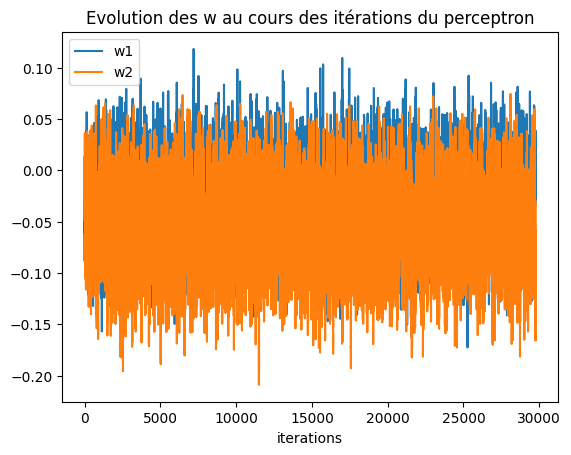

In [128]:
perceptron3 = classif.ClassifierPerceptron(5, learning_rate=lr_true, init=True)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
les_differences = perceptron3.train(Xapp, Yapp)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron3.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

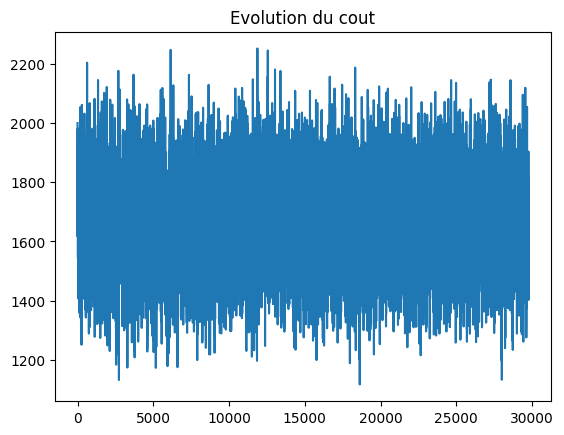

In [129]:
cout_evolution = C_evolutions(X5D,Y5D,allw)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


##### Perceptron 4 : 5 dimentions, learning rate optimal false, init = false

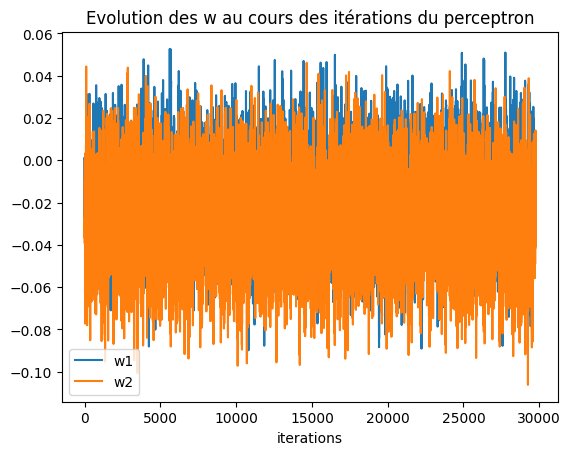

In [130]:
perceptron4 = classif.ClassifierPerceptron(5, learning_rate=lr_false, init=False)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
les_differences = perceptron4.train(Xapp, Yapp)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron4.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

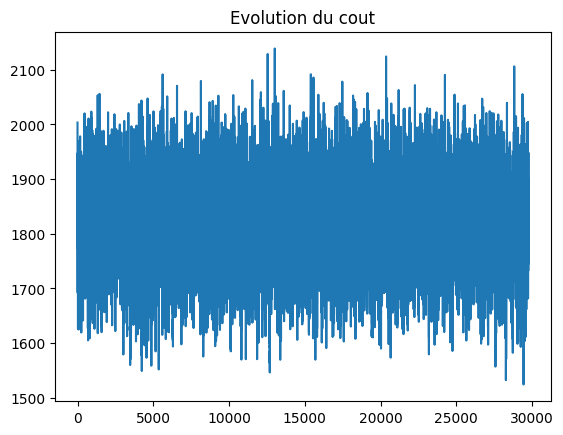

In [131]:
cout_evolution = C_evolutions(X5D, Y5D, allw2)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


#### <span style="color:green">Réusltats :</span>

-   Dans ce cas, nous avons bien vu que l'accuracy pour init=True est légèrement inférieure à celle pour init=False.


| Init | learning rate | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- |
| True | 0.021 | 0.8411 | 0.3478 |
| False | 0.011 | 0.8608 | 0.3627 |


## Conclusion sur le Modèle Percptron

-   Nous avons testé notre modèle de classification Perceptron sur deux jeux de données différents : un jeu de données en 2 dimensions et un autre en 5 dimensions. 

-   Nous avons observé que pour les résultats obtenus dans chaque jeu de données que initialisé ou pas le vecteur de poids W revient au même. C'est pour cela qu'on ne peut pas vraiment tirer des conclusion sur le comportemant du Perceptron.

-   Voici un tableau qui résume nos expérimentations :

| Jeu de données | init | learning rate | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- | --- |
| 2D | True | 0.006 | 0,807 | 0,97 |
| 2D | False | 0.021 | 0,799 | 0,68 |
| 5D | True | 0.021 | 0.8411 | 0.3478 |
| 5D | False | 0.011 | 0.8608 | 0.3627 |

# Expérimentation **Perceptron Biaisé**
* Dans cette partie la, nous allons procédé de la même façon que le perecepron normal. Nous allons généré des valeurs de learning rate, entraîner le modéle avec ces différentes valeurs afin de déterminer celle qui donne les meilleures performances.


## Dataset : data-2D.pkl

### Variation de Learning Rate (init = True)

In [157]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptronBiais(input_dimension=2, learning_rate=learning_rate, init=True)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

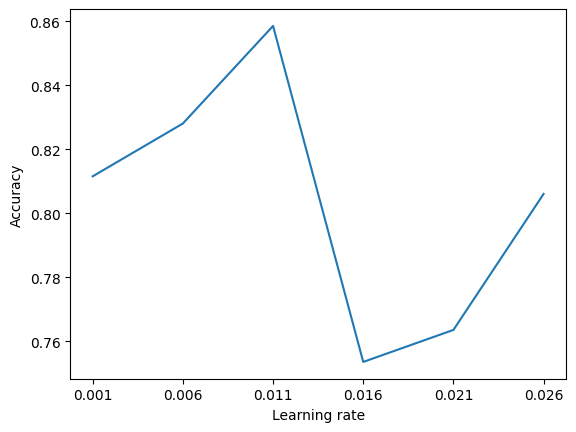

In [158]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [159]:
lr_true = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=True est : ", lr_true)

le learning rate optimal pour init=True est :  0.011


### Variation de Learning Rate (init = False)

In [160]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptronBiais(
            input_dimension=2, learning_rate=learning_rate, init=False)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

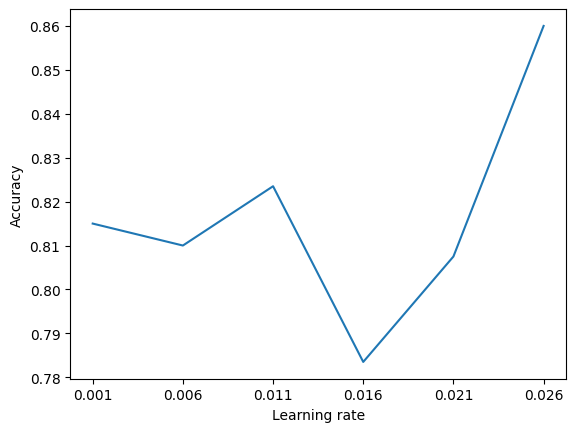

In [161]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [162]:
lr_false = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=False est : ",
      lr_false)


le learning rate optimal pour init=False est :  0.026000000000000002


#### <span style="color:blue"> Quoi choisir : init=False ou init=Ture ? </span>
Apres avoir les learning rate optimaux pour les deux, on va faire une série d'expérimentation pour savoir l'impact de chacun


In [163]:
acc_true = 0 
time_true = 0  


for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptronBiais(
        input_dimension=2, learning_rate=lr_true, init=True)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_true += perceptron.accuracy(Xtest, Ytest)
    time_true += execution_time

acc_true = acc_true/30
time_true = time_true/30

print("l'accuracy pour init=True est : ", acc_true)
print("le temps d'exécution moyen pour init=True est : ", time_true)

acc_false = 0
time_false = 0

for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptronBiais(
        input_dimension=2, learning_rate=lr_false, init=False)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_false += perceptron.accuracy(Xtest, Ytest)
    time_false += execution_time
acc_false = acc_false/30
time_false = time_false/30

print("l'accuracy pour init=False est : ", acc_false)
print("le temps d'exécution moyen pour init=False est : ", time_false)

l'accuracy pour init=True est :  0.8038333333333332
le temps d'exécution moyen pour init=True est :  0.6685950933373533
l'accuracy pour init=False est :  0.7954999999999998
le temps d'exécution moyen pour init=False est :  0.6480704599972038


#### Etude de la convergence du perceptron biaisé

#### PerceptronBiais 1 : 2 dimentions, learning rate optimal true, init = true

Accuracy :  0.795
Temps d'exécution :  0.6989516000030562


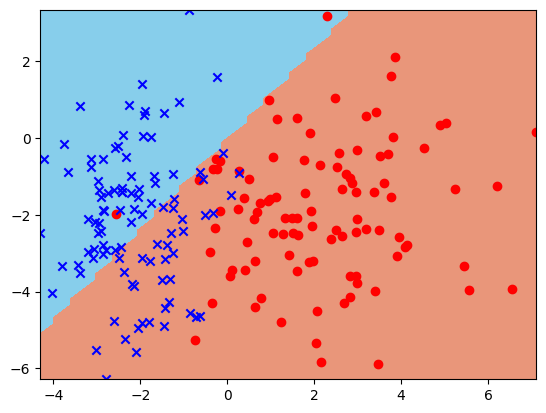

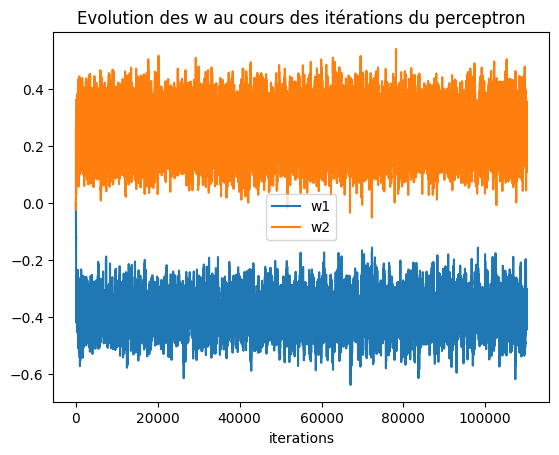

In [164]:
perceptron1 = classif.ClassifierPerceptronBiais(
    2, learning_rate=lr_true, init=True)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
start_time = time.perf_counter()
les_differences = perceptron1.train(Xapp, Yapp)
print("Accuracy : ", perceptron1.accuracy(Xtest, Ytest))
end_time = time.perf_counter()
execution_time = end_time - start_time
print("Temps d'exécution : ", execution_time)
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(Xtest, Ytest, perceptron1, step=60)
ut.plot2DSet(Xtest, Ytest)
# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron1.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

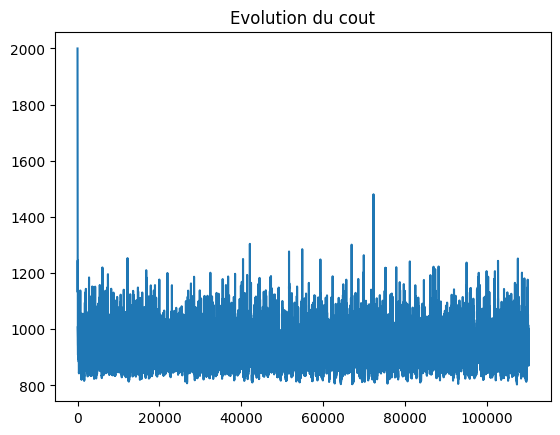

In [165]:
cout_evolution = C_evolutions(X2D,Y2D,allw)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


Perceptron 2 : 2 dimentions, learning rate optimal false, init = false

Accuracy :  0.81
Temps d'exécution :  0.6656697999569587


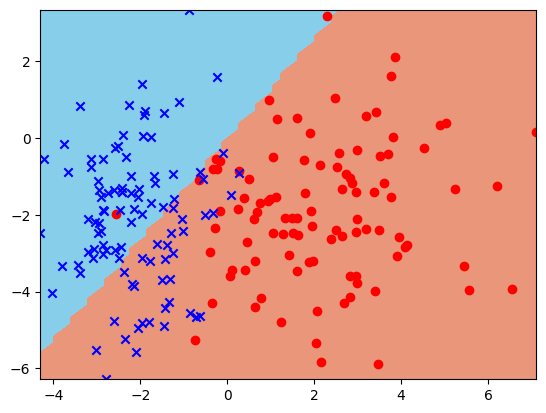

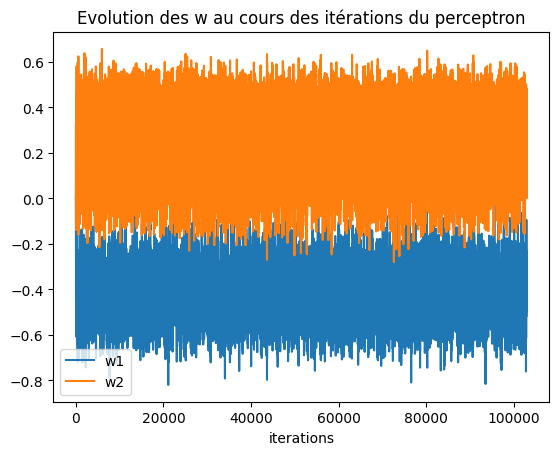

In [166]:
perceptron2 = classif.ClassifierPerceptronBiais(
    2, learning_rate=lr_false, init=False)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X2D, Y2D, 10, 2)
start_time = time.perf_counter()
les_differences = perceptron2.train(Xapp, Yapp)
print("Accuracy : ", perceptron2.accuracy(Xtest, Ytest))
end_time = time.perf_counter()
execution_time = end_time - start_time
print("Temps d'exécution : ", execution_time)
# Affichage de la frontière de séparation des classes
ut.plot_frontiere(Xtest, Ytest, perceptron2, step=60)
ut.plot2DSet(Xtest, Ytest)
# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron2.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

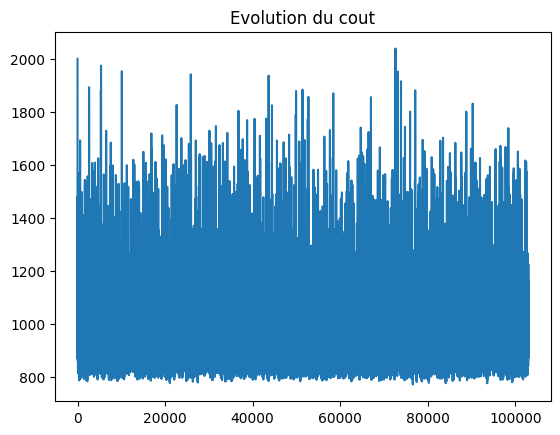

In [167]:
cout_evolution = C_evolutions(X2D, Y2D, allw2)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


## Dataset : data-5D.pkl

### Variation de Learning Rate (init = True)

In [173]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptronBiais(input_dimension=5, learning_rate=learning_rate, init=True)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

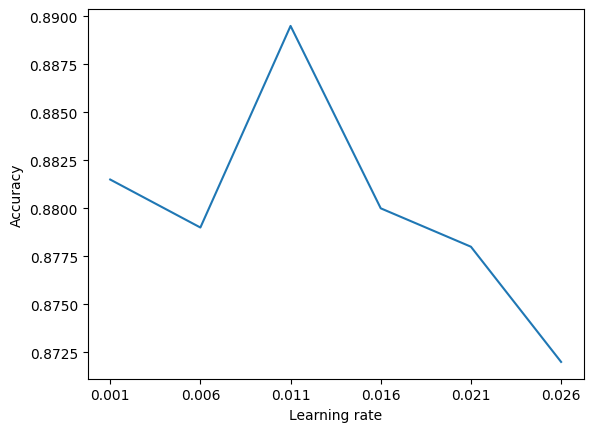

In [174]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [175]:
lr_true = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=True est : ", lr_true)

le learning rate optimal pour init=True est :  0.011


### Variation de Learning Rate (init = False)

In [176]:
# Liste des valeurs de learning rate à tester
learning_rates = [i * 0.001 for i in range(1, 31 , 5)]
accuracies = []  # Stockage des précisions pour chaque valeur de learning rate
times = []  # Stockage des temps d'exécution pour chaque valeur de learning rate
nb_iter = 10

for learning_rate in learning_rates:
    acc_test = 0 # Stockage de la précision moyenne sur les données de test
    time_exec = 0 # Stockage du temps d'exécution moyen
    for i in range(nb_iter):
        # initialisation du modèle
        perceptron = classif.ClassifierPerceptronBiais(
            input_dimension=5, learning_rate=learning_rate, init=False)
        Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, iter, i)
        start_time = time.perf_counter()  # Temps de départ de l'entraînement
        # Entraînement du modèle
        variations = perceptron.train(Xapp, Yapp)
        end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
        execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
        acc_test += perceptron.accuracy(Xtest, Ytest)
        time_exec += execution_time   

    accuracies.append(acc_test/nb_iter)
    times.append(time_exec/nb_iter)

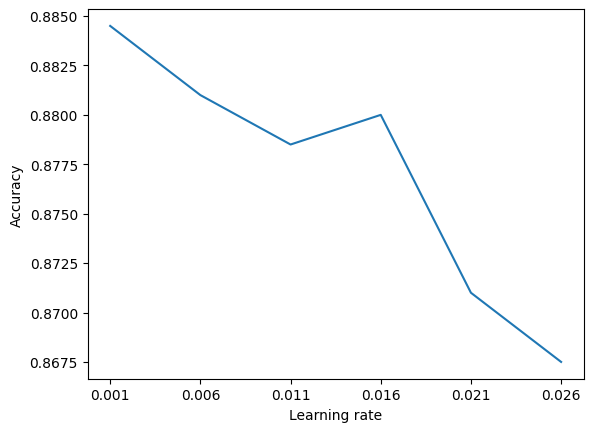

In [177]:
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xticks(learning_rates)
plt.show()

In [178]:
lr_false = learning_rates[accuracies.index(max(accuracies))]
print("le learning rate optimal pour init=False est : ",
      lr_false)


le learning rate optimal pour init=False est :  0.001


#### <span style="color:blue"> Quoi choisir : init=False ou init=Ture ? </span>
Apres avoir les learning rate optimaux pour les deux, on va faire une série d'expérimentation pour savoir l'impact de chacun


In [185]:
acc_true = 0 
time_true = 0  


for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptronBiais(
        input_dimension=5, learning_rate=lr_true, init=True)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_true += perceptron.accuracy(Xtest, Ytest)
    time_true += execution_time

acc_true = acc_true/30
time_true = time_true/30

print("l'accuracy pour init=True est : ", acc_true)
print("le temps d'exécution moyen pour init=True est : ", time_true)

acc_false = 0
time_false = 0

for i in range(30):
    # initialisation du modèle
    perceptron = classif.ClassifierPerceptronBiais(
        input_dimension=5, learning_rate=lr_false, init=False)
    Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
    start_time = time.perf_counter()  # Temps de départ de l'entraînement
    # Entraînement du modèle
    variations = perceptron.train(Xapp, Yapp)
    end_time = time.perf_counter()  # Temps d'arrêt de l'entraînement
    execution_time = end_time - start_time  # Temps d'exécution de l'entraînement
    acc_false += perceptron.accuracy(Xtest, Ytest)
    time_false += execution_time
acc_false = acc_false/30
time_false = time_false/30

print("l'accuracy pour init=False est : ", acc_false)
print("le temps d'exécution moyen pour init=False est : ", time_false)

l'accuracy pour init=True est :  0.8776666666666666
le temps d'exécution moyen pour init=True est :  0.5926905399983904
l'accuracy pour init=False est :  0.8814999999999998
le temps d'exécution moyen pour init=False est :  0.5732908066653181


#### Etude de la convergence du perceptron 

##### Perceptron 3 : 5 dimentions, learning rate optimal true, init = true

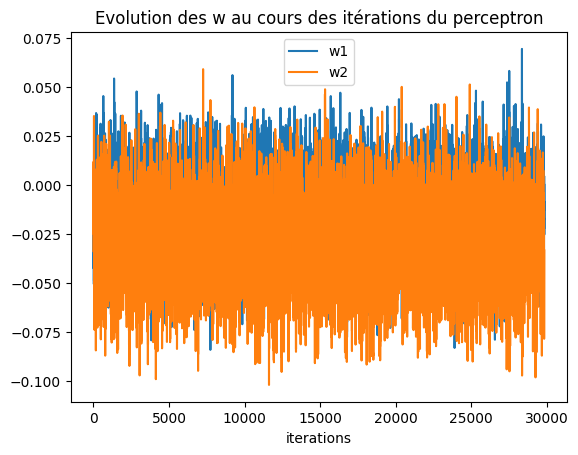

In [180]:
perceptron3 = classif.ClassifierPerceptron(5, learning_rate=lr_true, init=True)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
les_differences = perceptron3.train(Xapp, Yapp)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw = np.array(perceptron3.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

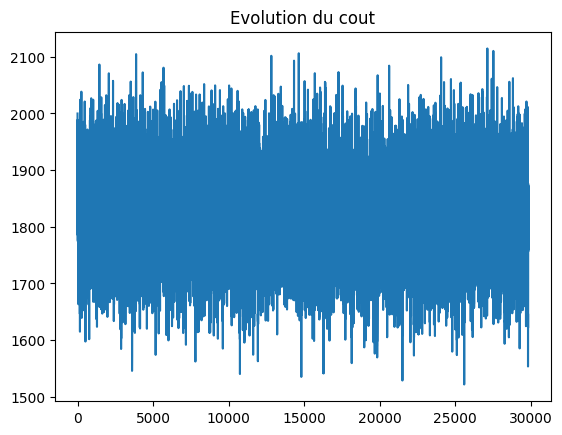

In [181]:
cout_evolution = C_evolutions(X5D,Y5D,allw)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


##### Perceptron 4 : 5 dimentions, learning rate optimal false, init = false

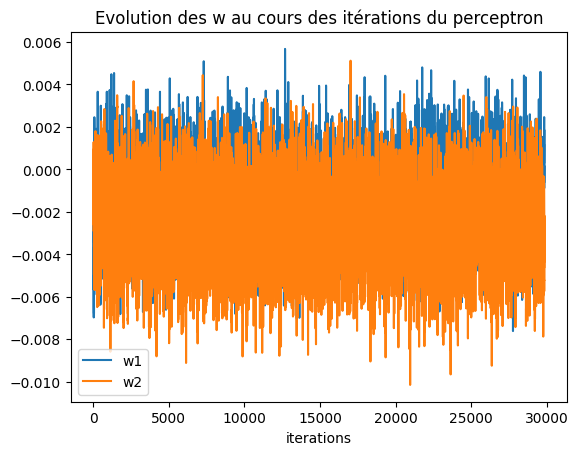

In [182]:
perceptron4 = classif.ClassifierPerceptron(5, learning_rate=lr_false, init=False)
Xapp, Yapp, Xtest, Ytest = crossval_strat(X5D, Y5D, 10, 2)
les_differences = perceptron4.train(Xapp, Yapp)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron4.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

Text(0.5, 1.0, 'Evolution du cout')

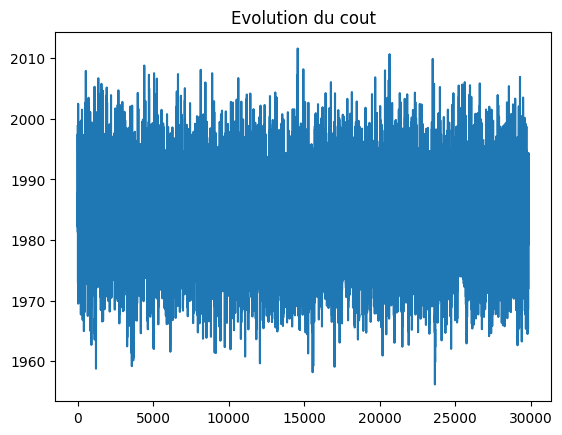

In [183]:
cout_evolution = C_evolutions(X5D, Y5D, allw2)
plt.figure()
plt.plot(cout_evolution)
plt.title('Evolution du cout')


## <span style="color:green">Réusltats du Perceptron Biaisé :</span>

| Jeu de données | init | learning rate | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- | --- |
| 2D | True | 0.011 |  0.8038 | 0.6685 |
| 2D | False | 0.0260 | 0.7954 | 0.6480 |
| 5D | True | 0.011 | 0.8776 | 0.5926 |
| 5D | False | 0.001 | 0.8814 | 0.5732 |


# Conclusion générale

-   Tableau qui résume nos expérimentation :

| Jeu de données | Classifieur (parametre) | Exactitude (Accuracy) | Temps d'exécution |
| --- | --- | --- | --- | 
| <span style="color: green">2D</span> | KNN | 0,96 | 0.03644 |
| <span style="color: green">2D</span> | Perceptron (init=True) | 0,807 | 0,97 |
| <span style="color: green">2D</span> | Perceptron (init=False) | 0,799 | 0,68 |
| <span style="color: green">2D</span> | Perceptron Biaisé (init=True) | 0.0260 | 0.7954 |
| <span style="color: green">2D</span> | Perceptron Biaisé (init=False) | 0.0260 | 0.7954 | 
| <span style="color: red">5D</span> | KNN | 0,89 | 0.04997 |
| <span style="color: red">5D</span> | Perceptron (init=True) | 0.8411 | 0.3478 |
| <span style="color: red">5D</span> | Perceptron (init=False) | 0.8608 | 0.3627 |
| <span style="color: red">5D</span> | Perceptron Biaisé (init=True) | 0.8776 | 0.5926 |
| <span style="color: red">5D</span> | Perceptron Biaisé (init=False) | 0.8814 | 0.5732 |

D'après les résultats que nous avons, on peut tirer quelques conclusions :

-   En ce qui concerne les modèles de classification pour les données à 2 dimensions, le modèle KNN semble être le plus performant avec une exactitude (accuracy) de 0,96, tandis que les modèles de perceptron ont une exactitude inférieure à 0,81. 
-   Pour les données à 5 dimensions, les modèles de perceptron ont des performances inférieures à celles du modèle KNN, avec une exactitude d'environ 0,89 contre environ 0,84 pour les modèles de perceptron. Les modèles de perceptron biaisés ont une meilleure exactitude que les modèles de perceptron non biaisés, avec une exactitude d'environ 0,88.
Les performances des modèles de perceptron ne sont pas très éloignées les unes des autres pour les deux ensembles de données. Cependant, on peut noter que les modèles de perceptron biaisés ont des performances légèrement supérieures à celles des modèles de perceptron non biaisés.

Mais il serait utile de comparer les performances de nos modèles avec autre modèles références: 

-   Pour le problème de classification à 2 dimensions, on pourra comparer nos modèle avec un modèle de classification logistique (logistic regression).
-   Pour le problème de classification à 5 dimensions, un modèle de référence approprié pourrait être le modèle de forêt aléatoire (random forest).

